# Problem Statement

Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability interms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup. IMFDB is the first face database that provides a detailed annotation of every image in terms of age, pose, gender, expression and type of occlusion that may help other face related applications. 

## Data
The dataset is cleaned and formatted to give you a total of 26742 images with 19906 images in train and 6636 images in test.


## AIM
The task is to predict the age of a person from his or her facial attributes. For simplicity, the problem has been converted to a multiclass problem with classes as Young, Middle and Old.

## Loding Images

In [93]:
#% pylab inline
import os
import random
import cv2

import pandas as pd

In [2]:
train_path = '/home/bharath/Desktop/hackathon/train/'
test_path = '/home/bharath/Desktop/hackathon/test/'

train = pd.read_csv(train_path + 'train.csv',delimiter=",", index_col=None)
test = pd.read_csv(test_path + 'test.csv',delimiter=",", index_col=None)

Random image and it's label from train data set

Age:  MIDDLE


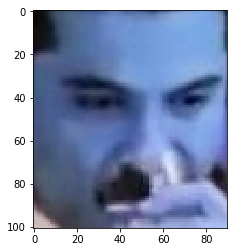

In [3]:
i = random.choice(train.index)

img_name = train.ID[i]
img = cv2.imread(os.path.join(train_path, 'Train', img_name))

print "Age: ", train.Class[i]
imshow(img)

## Read Train and Test images
Preprocessing the images read,

1. Read image using cv2
2. Adding Gaussian Blur/Gaussian Noice (Gaussian Noise kernel)
3. Resize image to 32x32
4. convert images to numpy arrays
5. standardize

In [4]:
## Train set
temp = []
for img_name in train.ID:
    img_path = os.path.join(train_path, 'Train', img_name)
    img = cv2.imread(img_path)
    
    #Gausian blur - Applies a Gaussian Noise kernel
    kernel_size = 7
    img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    img = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    img = img.astype('float32') 
    temp.append(img)

train_x = np.stack(temp)

In [5]:
## Test Set
temp = []
for img_name in test.ID:
    img_path = os.path.join(test_path, 'Test', img_name)
    img = cv2.imread(img_path)
    #Gausian blur - Applies a Gaussian Noise kernel
    kernel_size = 7
    img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    img = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [6]:
train_x = train_x / 255.
test_x = test_x / 255.

In [7]:
import keras
from sklearn.preprocessing import LabelEncoder
## Convert target variable to categorical variable
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


In [88]:
epochs = 40
batch_size = 64

In [9]:
import numpy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

# Model Building

Building a Convolutional Neural Network model coupled with a fully connected feed forward network!

<img src="cnn01.png">

In [86]:
# Building the model
cnn_model5 = Sequential()

cnn_model5.add(Conv2D(32, 5, 5, activation='relu', input_shape=(32, 32, 3)))
cnn_model5.add(MaxPooling2D(pool_size=(2,2)))

cnn_model5.add(Conv2D(32, 3, 3, activation='relu'))
cnn_model5.add(MaxPooling2D(pool_size=(2,2)))
cnn_model5.add(Flatten())

cnn_model5.add(Dense(500, init='uniform', activation='relu'))
cnn_model5.add(Dropout(0.4))

cnn_model5.add(Dense(100, init='uniform', activation='relu'))
cnn_model5.add(Dropout(0.4))

cnn_model5.add(Dense(20, init='uniform', activation='relu'))
cnn_model5.add(Dropout(0.4))

cnn_model5.add(Dense(3, activation='softmax'))

# Summary
cnn_model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 500)               576500    
_________________________________________________________________
dropout_55 (Dropout)         (None, 500)               0         
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 AP

In [91]:
#Setting Optimizer parameters
keras.optimizers.Adam(lr=0.03, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#Compile model
cnn_model5.compile(loss = "categorical_crossentropy",
              #optimizer = 'adadelta',
              #optimizer = 'sgd',
              optimizer = 'adam',
              metrics = ['accuracy'])
# Training
cnn_model5.fit(train_x, train_y, batch_size=batch_size, epochs=48,verbose=1, validation_split=0.2) #batch_size=batch_size,

Train on 15924 samples, validate on 3982 samples
Epoch 1/48
15924/15924 [==============================] - 25s 2ms/step - loss: 0.0996 - acc: 0.9682 - val_loss: 1.1866 - val_acc: 0.7853
Epoch 2/48
15924/15924 [==============================] - 28s 2ms/step - loss: 0.0786 - acc: 0.9765 - val_loss: 1.2748 - val_acc: 0.7798
Epoch 3/48
15924/15924 [==============================] - 29s 2ms/step - loss: 0.0894 - acc: 0.9719 - val_loss: 1.2148 - val_acc: 0.7785
Epoch 4/48
15924/15924 [==============================] - 29s 2ms/step - loss: 0.0908 - acc: 0.9721 - val_loss: 1.2693 - val_acc: 0.7790
Epoch 5/48
15924/15924 [==============================] - 29s 2ms/step - loss: 0.0710 - acc: 0.9783 - val_loss: 1.2920 - val_acc: 0.7780
Epoch 6/48
15924/15924 [==============================] - 29s 2ms/step - loss: 0.0784 - acc: 0.9756 - val_loss: 1.3705 - val_acc: 0.7833
Epoch 7/48
15924/15924 [==============================] - 30s 2ms/step - loss: 0.0827 - acc: 0.9741 - val_loss: 1.2430 - val_acc:

## Predicting on Test data

In [90]:
pred = cnn_model5.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('sub16.csv', index=False)

In [ ]:
## Predictions on Test accuracy - 0.781